<a href="https://colab.research.google.com/github/Muruganganesan/Stock-market-/blob/main/Stock_MARKET2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 50.6 MB/s eta 0:00:00


In [43]:
import pandas as pd
import re
import mysql.connector

# Establish database connection (make sure you have the correct credentials)
connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "MFbdJWf4C73eB9h.root",
  password = "yw9C9ScImIB0y4Xt",
  database = "Stock_market",
)
mycursor = connection.cursor(buffered=True)


In [44]:
mycursor.execute("SHOW TABLES")
tables = mycursor.fetchall()
for table in tables:
    print(table)


('Stock_2024',)


In [15]:
mycursor.execute("SELECT * FROM Stock_2024")
out=mycursor.fetchall()
from tabulate import tabulate
print(tabulate(out, headers=[i[0] for i in mycursor.description], tablefmt='psql'))

+------------+----------+---------------------+----------+----------+---------+----------+-----------+
| ticker     |    close | date                |     high |      low | month   |     open |    volume |
|------------+----------+---------------------+----------+----------+---------+----------+-----------|
| ADANIENT   |  3258.8  | 2024-05-29 05:30:00 |  3322.9  |  3212    | 2024-05 |  3250    |   1910729 |
| ADANIENT   |  3198.45 | 2024-04-09 05:30:00 |  3251    |  3185    | 2024-04 |  3240.7  |    833679 |
| ADANIENT   |  2973.5  | 2024-07-25 05:30:00 |  3017.65 |  2945.1  | 2024-07 |  2960.7  |   1105721 |
| ADANIENT   |  2887.15 | 2023-12-07 05:30:00 |  2945.9  |  2853.05 | 2023-12 |  2900    |   6325887 |
| ADANIENT   |  3110.65 | 2024-10-04 05:30:00 |  3149.5  |  3070    | 2024-10 |  3119.9  |    987583 |
| ADANIENT   |  2970.7  | 2024-07-24 05:30:00 |  3007.5  |  2959.3  | 2024-07 |  2995.35 |    693702 |
| ADANIENT   |  3193.8  | 2024-02-15 05:30:00 |  3252.75 |  3184.05 | 202

In [8]:
import pandas as pd
from tabulate import tabulate

# SQL query to calculate annual revenue and get top 10 stocks
mycursor.execute("""
    SELECT
        ticker,
        SUM(open * volume) AS annual_revenue
    FROM
        Stock_2024
    GROUP BY
        ticker
    ORDER BY
        annual_revenue DESC
    LIMIT 10
""")

out = mycursor.fetchall()
formatted_out = [(ticker, f"₹{round(revenue):,}") for ticker, revenue in out]

df = pd.DataFrame(formatted_out, columns=["Ticker", "Annual Revenue (Full Value)"])

df.to_csv('top_10_green_stocks.csv', index=False)

print(tabulate(df, headers='keys', tablefmt='github', showindex=False))


| Ticker     | Annual Revenue (Full Value)   |
|------------|-------------------------------|
| HDFCBANK   | ₹8,023,758,224,849            |
| RELIANCE   | ₹4,495,133,123,123            |
| ICICIBANK  | ₹4,289,178,865,795            |
| SBIN       | ₹3,400,121,728,304            |
| TATAMOTORS | ₹2,833,019,797,361            |
| INFY       | ₹2,814,127,640,085            |
| AXISBANK   | ₹2,760,851,806,249            |
| KOTAKBANK  | ₹2,439,712,929,663            |
| TCS        | ₹2,346,917,098,879            |
| LT         | ₹2,193,473,685,814            |


<ipython-input-16-7bc0d5bf2a98>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ticker', y='annual_revenue', data=df, palette='viridis')


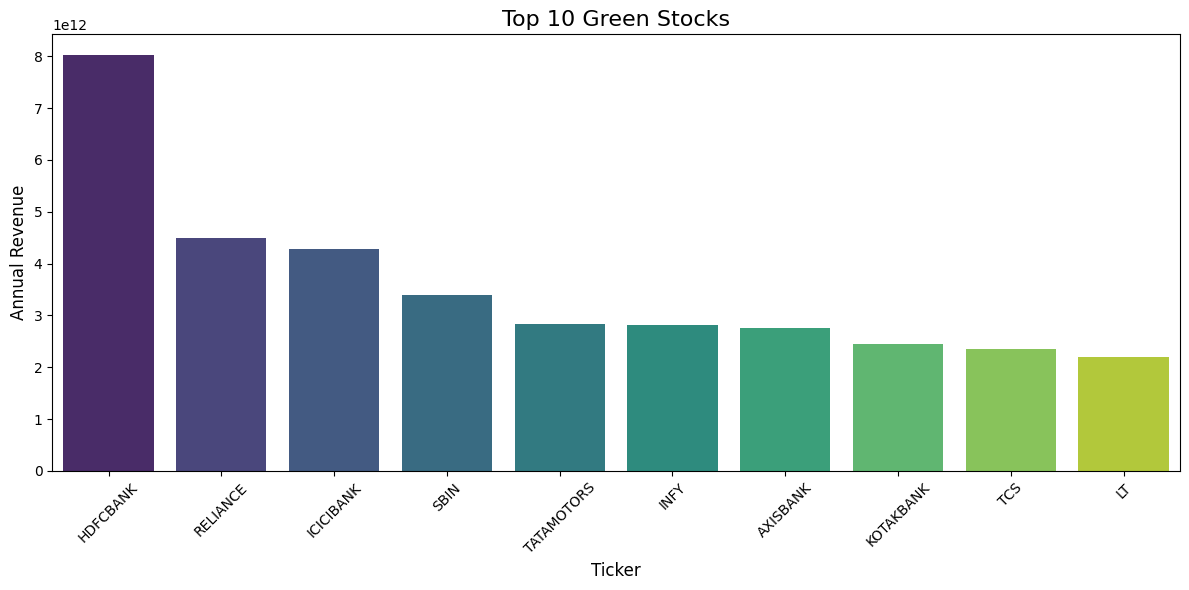

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SQL query execution
mycursor.execute("""
    SELECT
        ticker,
        SUM(open * volume) AS annual_revenue
    FROM
        Stock_2024
    GROUP BY
        ticker
    ORDER BY
        annual_revenue DESC
    LIMIT 10
""")
out = mycursor.fetchall()

columns = [i[0] for i in mycursor.description]

df = pd.DataFrame(out, columns=columns)

plt.figure(figsize=(12, 6))
sns.barplot(x='ticker', y='annual_revenue', data=df, palette='viridis')

plt.title('Top 10 Green Stocks', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Annual Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [17]:
import pandas as pd
from tabulate import tabulate

# SQL query to calculate annual revenue and get top 10 stocks
mycursor.execute("""
    SELECT
        ticker,
        SUM(open * volume) AS annual_revenue
    FROM
        Stock_2024
    GROUP BY
        ticker
    ORDER BY
        annual_revenue ASC
    LIMIT 10
""")

out = mycursor.fetchall()
formatted_out = [(ticker, f"₹{round(revenue):,}") for ticker, revenue in out]

df = pd.DataFrame(formatted_out, columns=["Ticker", "Annual Revenue (Full Value)"])

df.to_csv('top_10_red_stocks.csv', index=False)

print(tabulate(df, headers='keys', tablefmt='github', showindex=False))


| Ticker     | Annual Revenue (Full Value)   |
|------------|-------------------------------|
| BRITANNIA  | ₹457,521,083,709              |
| TATACONSUM | ₹481,032,300,257              |
| GRASIM     | ₹494,553,521,135              |
| JSWSTEEL   | ₹502,334,112,729              |
| SBILIFE    | ₹534,988,609,884              |
| NESTLEIND  | ₹588,501,125,021              |
| DRREDDY    | ₹629,843,253,893              |
| BAJAJFINSV | ₹645,449,993,640              |
| CIPLA      | ₹655,376,436,205              |
| APOLLOHOSP | ₹670,146,501,487              |


<ipython-input-18-948b9a813f9b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ticker', y='annual_revenue', data=df, palette='magma')


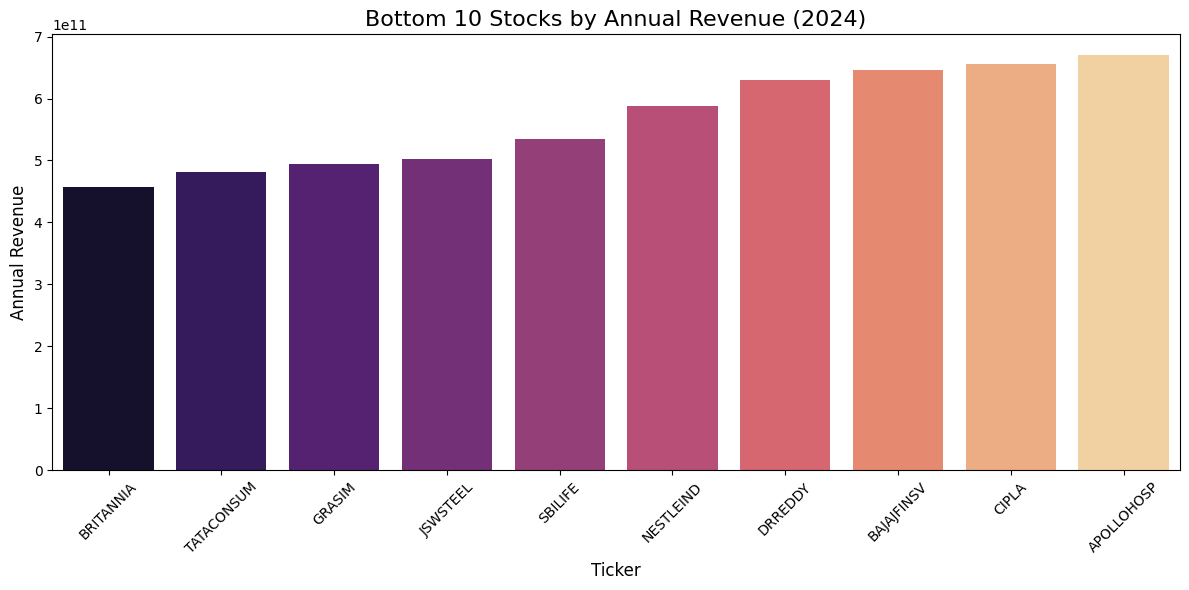

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Execute the SQL query for bottom 10 stocks by annual revenue
mycursor.execute("""
    SELECT
        ticker,
        SUM(open * volume) AS annual_revenue
    FROM
        Stock_2024
    GROUP BY
        ticker
    ORDER BY
        annual_revenue ASC
    LIMIT 10
""")
out = mycursor.fetchall()

# Convert to DataFrame
columns = [i[0] for i in mycursor.description]
df = pd.DataFrame(out, columns=columns)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='ticker', y='annual_revenue', data=df, palette='magma')

# Add title and labels
plt.title('Bottom 10 Stocks by Annual Revenue (2024)', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Annual Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


In [19]:
# Calculate the average price across all stocks:
mycursor.execute("""
    SELECT FLOOR(AVG(open)) AS average_price
    FROM Stock_2024;
""")
average_price = mycursor.fetchone()[0]
print(f"The average price across all stocks is: {average_price}")


The average price across all stocks is: 2519.0


In [20]:
# Calculate the average volume across all stocks:
mycursor.execute("""
    SELECT FLOOR(AVG(volume)) AS average_volume
    FROM Stock_2024;
""")
average_volume = mycursor.fetchone()[0]
print(f"The average volume across all stocks is: {average_volume}")


The average volume across all stocks is: 7197206


In [21]:
# prompt: Calculate daily returns for each stock: (Close Price - Previous Close Price) / Previous Close Price.

# Calculate daily returns
mycursor.execute("""
    SELECT date, ticker, close
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'close'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date', 'ticker'])
daily_returns = df.groupby('ticker')['close'].pct_change()

# Convert daily_returns to a list of lists for tabulate
daily_returns_list = []
for (date, ticker), value in daily_returns.items():
    daily_returns_list.append([date, ticker, value])

# Print the tabulated data
from tabulate import tabulate
print(tabulate(daily_returns_list, headers=["Date", "Ticker", "Daily Returns"], tablefmt="github"))

| Date                | Ticker     |   Daily Returns |
|---------------------|------------|-----------------|
| 2023-12-01 05:30:00 | ADANIENT   |   nan           |
| 2023-12-04 05:30:00 | ADANIENT   |     0.0713167   |
| 2023-12-05 05:30:00 | ADANIENT   |     0.169149    |
| 2023-12-06 05:30:00 | ADANIENT   |    -0.0254786   |
| 2023-12-07 05:30:00 | ADANIENT   |     0.00110959  |
| 2023-12-08 05:30:00 | ADANIENT   |    -0.0225136   |
| 2023-12-11 05:30:00 | ADANIENT   |     0.0119235   |
| 2023-12-12 05:30:00 | ADANIENT   |     0.000647804 |
| 2023-12-13 05:30:00 | ADANIENT   |     0.00608892  |
| 2023-12-14 05:30:00 | ADANIENT   |     0.00660858  |
| 2023-12-15 05:30:00 | ADANIENT   |     0.0337762   |
| 2023-12-18 05:30:00 | ADANIENT   |    -0.00374357  |
| 2023-12-19 05:30:00 | ADANIENT   |    -0.013202    |
| 2023-12-20 05:30:00 | ADANIENT   |    -0.0535147   |
| 2023-12-21 05:30:00 | ADANIENT   |     0.00571151  |
| 2023-12-22 05:30:00 | ADANIENT   |     0.0030717   |
| 2023-12-

In [22]:
# prompt: Visualize the volatility of each stock over the past year by calculating the standard deviation of daily returns.

# Calculate daily returns
mycursor.execute("""
    SELECT date, ticker, open
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'open'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date', 'ticker'])
daily_returns = df.groupby('ticker')['open'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.groupby('ticker').std()

print(volatility)

ticker
ADANIENT      0.030682
ADANIPORTS    0.027410
APOLLOHOSP    0.014820
ASIANPAINT    0.013937
AXISBANK      0.016391
BAJAJ-AUTO    0.018451
BAJAJFINSV    0.013826
BAJFINANCE    0.017024
BEL           0.026106
BHARTIARTL    0.015850
BPCL          0.023856
BRITANNIA     0.014278
CIPLA         0.016048
COALINDIA     0.021658
DRREDDY       0.013309
EICHERMOT     0.016178
GRASIM        0.016165
HCLTECH       0.016312
HDFCBANK      0.015949
HDFCLIFE      0.017088
HEROMOTOCO    0.018321
HINDALCO      0.021968
HINDUNILVR    0.012931
ICICIBANK     0.014346
INDUSINDBK    0.017927
INFY          0.014319
ITC           0.013575
JSWSTEEL      0.016664
KOTAKBANK     0.013255
LT            0.016791
M&M           0.020215
MARUTI        0.014408
NESTLEIND     0.012476
NTPC          0.020908
ONGC          0.021881
POWERGRID     0.021935
RELIANCE      0.013730
SBILIFE       0.015899
SBIN          0.017250
SHRIRAMFIN    0.023196
SUNPHARMA     0.013891
TATACONSUM    0.016465
TATAMOTORS    0.018010
TATA

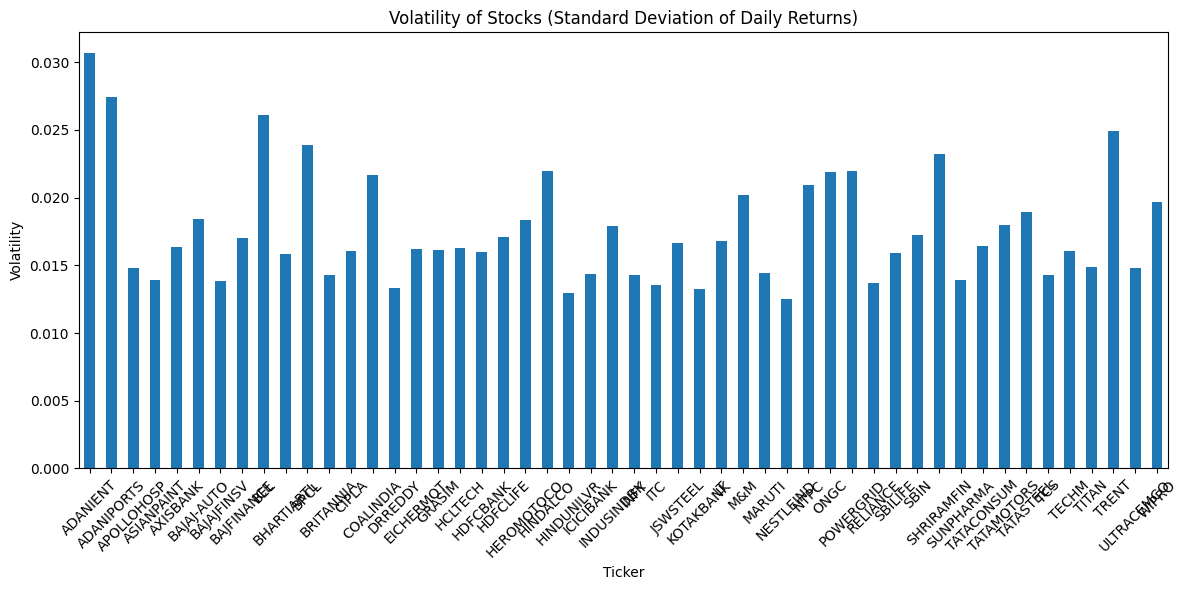

In [23]:
# prompt: Visualize the volatility of each stock over the past year by calculating the standard deviation of daily returns.

# Calculate daily returns
mycursor.execute("""
    SELECT date, ticker, open
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'open'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date', 'ticker'])
daily_returns = df.groupby('ticker')['open'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.groupby('ticker').std()

# Plotting
plt.figure(figsize=(12, 6))
volatility.plot(kind='bar')
plt.title('Volatility of Stocks (Standard Deviation of Daily Returns)')
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Sort volatility in descending order and get the top 10
top_10_volatility = volatility.sort_values(ascending=False).head(10)
top_10_volatility.to_csv('top_10_volatility.csv', index=True)  # Set index=True if you want to keep the index in the CSV file

print(top_10_volatility)


ticker
ADANIENT      0.030682
ADANIPORTS    0.027410
BEL           0.026106
TRENT         0.024928
BPCL          0.023856
SHRIRAMFIN    0.023196
HINDALCO      0.021968
POWERGRID     0.021935
ONGC          0.021881
COALINDIA     0.021658
Name: open, dtype: float64


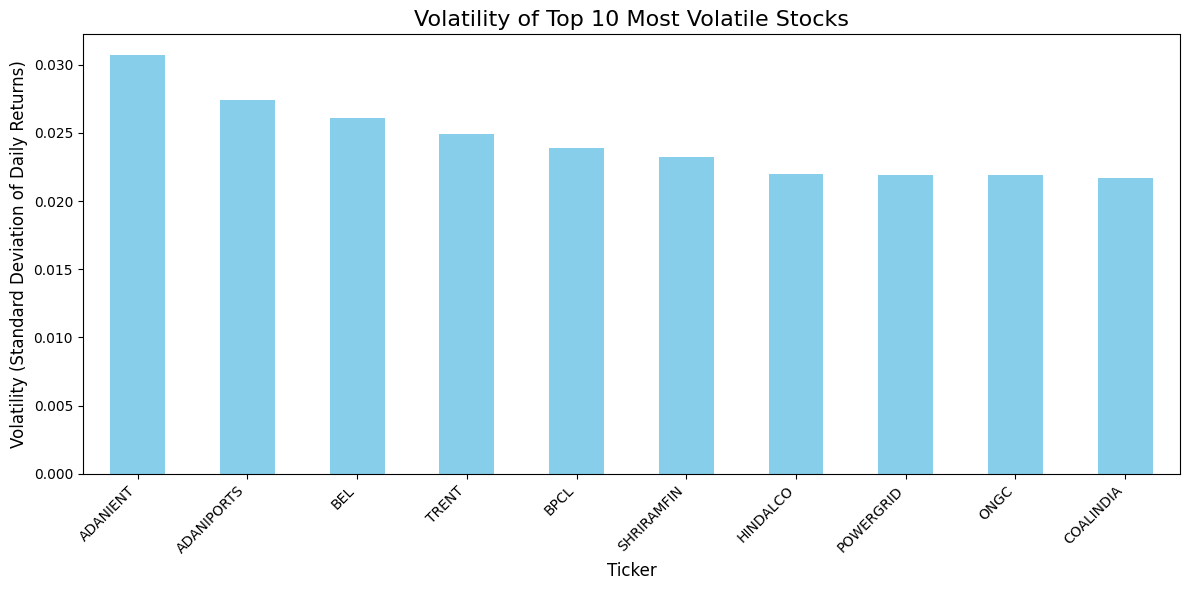

In [ ]:
# Sort volatility in descending order and get the top 10
top_10_volatility = volatility.sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_10_volatility.plot(kind='bar', color='skyblue')
plt.title('Volatility of Top 10 Most Volatile Stocks', fontsize=16)
plt.xlabel('Ticker', fontsize=12)
plt.ylabel('Volatility (Standard Deviation of Daily Returns)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [29]:
# prompt: Show the cumulative return of each stock from the beginning of the year to the end.

# Calculate daily returns
mycursor.execute("""
    SELECT date, ticker, open
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'open'])
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['date', 'ticker'])
daily_returns = df.groupby('ticker')['open'].pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Convert cumulative_returns to a list of lists for tabulate
cumulative_returns_list = []  # Define the list
for (date, ticker), value in cumulative_returns.items():
    cumulative_returns_list.append([date, ticker, value])

# Display cumulative returns using tabulate
from tabulate import tabulate
print(tabulate(cumulative_returns_list, headers=["Date", "Ticker", "Cumulative Returns"], tablefmt="github"))

| Date                | Ticker     |   Cumulative Returns |
|---------------------|------------|----------------------|
| 2023-12-01 05:30:00 | ADANIENT   |         nan          |
| 2023-12-04 05:30:00 | ADANIENT   |           0.0759283  |
| 2023-12-05 05:30:00 | ADANIENT   |           0.0680169  |
| 2023-12-06 05:30:00 | ADANIENT   |           0.299578   |
| 2023-12-07 05:30:00 | ADANIENT   |           0.223629   |
| 2023-12-08 05:30:00 | ADANIENT   |           0.224768   |
| 2023-12-11 05:30:00 | ADANIENT   |           0.197068   |
| 2023-12-12 05:30:00 | ADANIENT   |           0.210591   |
| 2023-12-13 05:30:00 | ADANIENT   |           0.206751   |
| 2023-12-14 05:30:00 | ADANIENT   |           0.22403    |
| 2023-12-15 05:30:00 | ADANIENT   |           0.228713   |
| 2023-12-18 05:30:00 | ADANIENT   |           0.26327    |
| 2023-12-19 05:30:00 | ADANIENT   |           0.261097   |
| 2023-12-20 05:30:00 | ADANIENT   |           0.243038   |
| 2023-12-21 05:30:00 | ADANIENT   |    

In [31]:
import pandas as pd
from tabulate import tabulate

# Group by ticker and get the last cumulative return for each ticker
last_cumulative_returns = cumulative_returns.groupby('ticker').last()

# Sort by cumulative returns in descending order and get the top 5
top_5_cumulative_returns = last_cumulative_returns.sort_values(ascending=False).head(5)

# Convert to a list of lists for tabulate
top_5_list = []

for ticker, value in top_5_cumulative_returns.items():
    top_5_list.append([ticker, value])

# Convert top_5_list to a DataFrame
top_5_df = pd.DataFrame(top_5_list, columns=["Ticker", "Cumulative Returns"])

# Saving the DataFrame to CSV
top_5_df.to_csv('top_5_cumulative_returns.csv', index=False)

# Optionally, print the result in a formatted table style
print(tabulate(top_5_list, headers=["Ticker", "Cumulative Returns"], tablefmt="github"))


| Ticker     |   Cumulative Returns |
|------------|----------------------|
| WIPRO      |             3525.24  |
| ULTRACEMCO |             2595.28  |
| TRENT      |             2147.93  |
| TECHM      |             1020.77  |
| TITAN      |              926.114 |


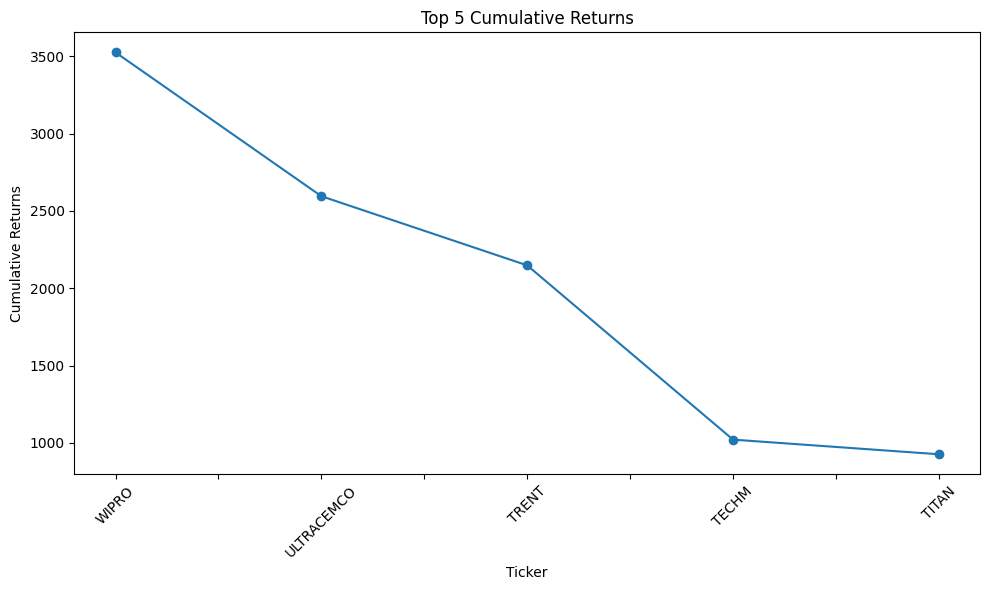

In [ ]:
# Get the top 5 tickers with the highest cumulative returns on the last date
last_date = cumulative_returns.index.get_level_values('date').max()
top_5_cumulative_returns = cumulative_returns.loc[last_date].sort_values(ascending=False).head(5)

# Plotting the line chart
plt.figure(figsize=(10, 6))
top_5_cumulative_returns.plot(kind='line', marker='o')
plt.title('Top 5 Cumulative Returns')
plt.xlabel('Ticker')
plt.ylabel('Cumulative Returns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate daily percentage change for closing prices
mycursor.execute("""
    SELECT date, ticker, close
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'close'])
df['date'] = pd.to_datetime(df['date'])
df = df.pivot(index='date', columns='ticker', values='close').pct_change()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix using tabulate
print(tabulate(correlation_matrix, headers='keys', tablefmt='psql'))


+------------+------------+--------------+--------------+--------------+------------+--------------+--------------+--------------+------------+--------------+-------------+-------------+------------+-------------+------------+-------------+----------+-----------+------------+-------------+--------------+------------+--------------+-------------+--------------+------------+----------+------------+-------------+------------+----------+-----------+-------------+------------+------------+-------------+------------+-----------+------------+--------------+-------------+--------------+--------------+-------------+-----------+-----------+-----------+-----------+--------------+-----------+
| ticker     |   ADANIENT |   ADANIPORTS |   APOLLOHOSP |   ASIANPAINT |   AXISBANK |   BAJAJ-AUTO |   BAJAJFINSV |   BAJFINANCE |        BEL |   BHARTIARTL |        BPCL |   BRITANNIA |      CIPLA |   COALINDIA |    DRREDDY |   EICHERMOT |   GRASIM |   HCLTECH |   HDFCBANK |    HDFCLIFE |   HEROMOTOCO |   HI

Top Performers (Monthly Average Closing Price):
ticker     BAJAJ-AUTO   BAJFINANCE        MARUTI    ULTRACEMCO
date                                                          
2023-12           NaN  7367.770000  10387.270000   9805.562500
2024-01           NaN  7375.731818  10030.240909  10004.890909
2024-02   8060.828571          NaN  11094.278571   9946.692857
2024-03   8589.271053          NaN  11762.550000   9706.031579
2024-04   8951.887500          NaN  12657.082500   9736.090000
2024-05   8936.438636          NaN  12648.629545   9832.072727
2024-06   9662.305263          NaN  12454.036842  10842.413158
2024-07   9498.631818          NaN  12522.438636  11669.540909
2024-08   9971.814286          NaN  12343.797619  11351.369048
2024-09  11693.471429          NaN  12525.876190  11671.285714
2024-10  10981.631818          NaN  12170.975000  11223.713636
2024-11   9688.992857          NaN  11133.335714  10985.450000

Bottom Performers (Monthly Average Closing Price):
ticker          BE

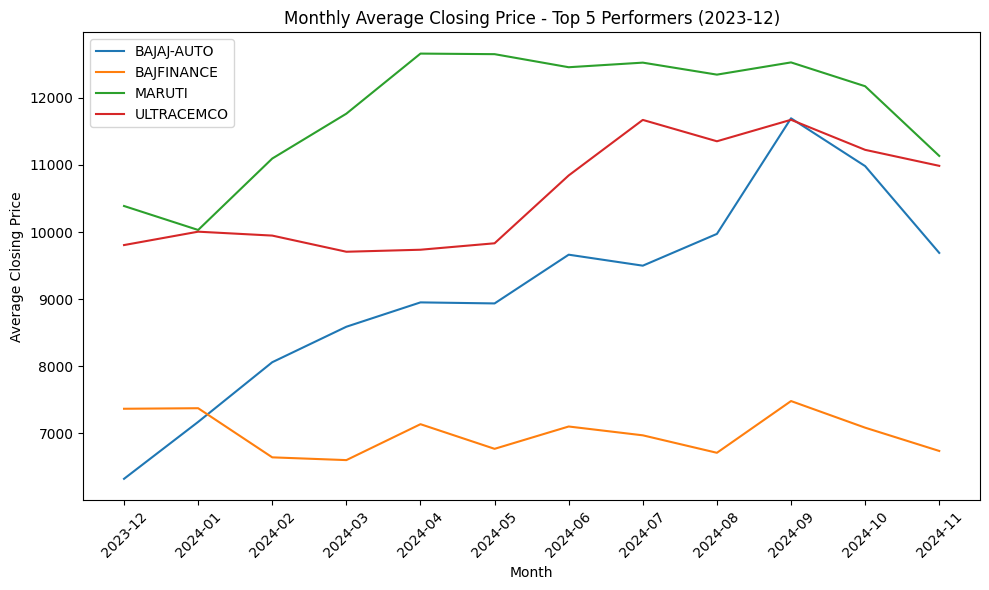

In [32]:
# prompt: Objective: Provide monthly breakdowns of the top-performing and worst-performing stocks.
# Reason: This analysis will allow users to observe more granular trends and understand which stocks are gaining or losing momentum on a monthly basis.

# Fetch the necessary data from the database
mycursor.execute("""
    SELECT date, ticker, close
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'close'])
df['date'] = pd.to_datetime(df['date'])

# Group the data by month and ticker
monthly_data = df.groupby([df['date'].dt.to_period('M'), 'ticker'])

# Example: Calculate the monthly average closing price
monthly_avg_close = monthly_data['close'].mean().unstack()

# Find the top and bottom performers each month
top_performers = monthly_avg_close.apply(lambda x: x.nlargest(3), axis=1) # Top 3
bottom_performers = monthly_avg_close.apply(lambda x: x.nsmallest(3), axis=1) # Bottom 3

print("Top Performers (Monthly Average Closing Price):")
print(top_performers)

print("\nBottom Performers (Monthly Average Closing Price):")
print(bottom_performers)


# Example Visualization (optional)
# Plot the monthly average closing price for the top 3 performers of the first month.
first_month_top = top_performers.iloc[0]

plt.figure(figsize=(10, 6))
for ticker in first_month_top.index:
  # Convert PeriodIndex to a list of strings for plotting
  x_values = [str(period) for period in monthly_avg_close.index]
  plt.plot(x_values, monthly_avg_close[ticker], label=ticker)

plt.title(f"Monthly Average Closing Price - Top 5 Performers ({monthly_avg_close.index[0]})")
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
# prompt: Group the stock data by month and calculate the monthly return for each stock in all tickers view in tabulate format

# Calculate monthly returns
monthly_returns = df.groupby([df['date'].dt.to_period('M'), 'ticker'])['close'].last().unstack().pct_change()

# Print the monthly returns in a tabulated format
print(tabulate(monthly_returns, headers='keys', tablefmt='psql'))


+---------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+---------------+--------------+--------------+-------------+---------------+--------------+--------------+---------------+--------------+-------------+--------------+--------------+--------------+-------------+--------------+-------------+--------------+--------------+--------------+--------------+--------------+---------------+--------------+--------------+--------------+---------------+-------------+-------------+-------------+--------------+--------------+--------------+-------------+--------------+--------------+-------------+--------------+-------------+--------------+-------------+--------------+--------------+
| date    |     ADANIENT |   ADANIPORTS |   APOLLOHOSP |   ASIANPAINT |     AXISBANK |   BAJAJ-AUTO |   BAJAJFINSV |   BAJFINANCE |           BEL |   BHARTIARTL |         BPCL |   BRITANNIA |         CIPLA |    COALINDIA |      DRREDDY |     EI

In [46]:
# Identify the top 5 profitable tickers based on percentage change for each month. View in table format.

import pandas as pd
from tabulate import tabulate
# Calculate monthly percentage change for closing prices
mycursor.execute("""
    SELECT date, ticker, close
    FROM Stock_2024
    ORDER BY ticker, date
""")
data = mycursor.fetchall()
df = pd.DataFrame(data, columns=['date', 'ticker', 'close'])
df['date'] = pd.to_datetime(df['date'])
df = df.pivot(index='date', columns='ticker', values='close').pct_change()

monthly_returns = df.resample('M').last().pct_change()

# Function to get top 5 tickers for each month
def get_top_5_monthly(monthly_returns_df):
    top_5_monthly = {}
    for month, row in monthly_returns_df.iterrows():
        top_5 = row.nlargest(5)
        top_5_monthly[month] = top_5
    return top_5_monthly

# Get the top 5 profitable tickers for each month
top_5_per_month = get_top_5_monthly(monthly_returns)

# Display in table format
for month, tickers in top_5_per_month.items():
    print(f"Top 5 Profitable Tickers for {month.strftime('%Y-%m')}:")
    data = [[ticker, percentage_change] for ticker, percentage_change in tickers.items()]
    print(tabulate(data, headers=['Ticker', 'Percentage Change'], tablefmt='grid'))
    print("\n")


Top 5 Profitable Tickers for 2023-12:
+------------+---------------------+
| Ticker     |   Percentage Change |
+============+=====================+
| ADANIENT   |                 nan |
+------------+---------------------+
| ADANIPORTS |                 nan |
+------------+---------------------+
| APOLLOHOSP |                 nan |
+------------+---------------------+
| ASIANPAINT |                 nan |
+------------+---------------------+
| AXISBANK   |                 nan |
+------------+---------------------+


Top 5 Profitable Tickers for 2024-01:
+------------+---------------------+
| Ticker     |   Percentage Change |
+============+=====================+
| HINDALCO   |            18.8169  |
+------------+---------------------+
| BAJAJFINSV |             7.44445 |
+------------+---------------------+
| MARUTI     |             6.90923 |
+------------+---------------------+
| HDFCBANK   |             4.38683 |
+------------+---------------------+
| WIPRO      |             2.03434

<ipython-input-46-e4dc24d7a341>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df.resample('M').last().pct_change()


In [48]:
# prompt: Identify the top 5 losing tickers based on percentage change for each month. View in table format.

# Function to get bottom 5 tickers for each month
def get_bottom_5_monthly(monthly_returns_df):
    bottom_5_monthly = {}
    for month, row in monthly_returns_df.iterrows():
        bottom_5 = row.nsmallest(5)
        bottom_5_monthly[month] = bottom_5
    return bottom_5_monthly

# Get the bottom 5 losing tickers for each month
bottom_5_per_month = get_bottom_5_monthly(monthly_returns)

# Display in table format
for month, tickers in bottom_5_per_month.items():
    print(f"Bottom 5 Losing Tickers for {month.strftime('%Y-%m')}:")
    data = [[ticker, percentage_change] for ticker, percentage_change in tickers.items()]
    print(tabulate(data, headers=['Ticker', 'Percentage Change'], tablefmt='grid'))
    print("\n")


Bottom 5 Losing Tickers for 2023-12:
+------------+---------------------+
| Ticker     |   Percentage Change |
+============+=====================+
| ADANIENT   |                 nan |
+------------+---------------------+
| ADANIPORTS |                 nan |
+------------+---------------------+
| APOLLOHOSP |                 nan |
+------------+---------------------+
| ASIANPAINT |                 nan |
+------------+---------------------+
| AXISBANK   |                 nan |
+------------+---------------------+


Bottom 5 Losing Tickers for 2024-01:
+-----------+---------------------+
| Ticker    |   Percentage Change |
+===========+=====================+
| LT        |           -19.7018  |
+-----------+---------------------+
| SUNPHARMA |           -16.9144  |
+-----------+---------------------+
| JSWSTEEL  |           -14.1154  |
+-----------+---------------------+
| GRASIM    |           -10.5463  |
+-----------+---------------------+
| M&M       |            -7.61327 |
+----------